<a href="https://colab.research.google.com/github/RiskyHermawan/TugasPraktikumML_141_169/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [6]:
!ls

 breakhis-400x.zip		       'SOB_B_A-14-22549AB-400-001 (2).png'
 cat2dog.zip			       'SOB_B_A-14-22549AB-400-001 (3).png'
 flowers-recognition.zip	       'SOB_B_A-14-22549AB-400-001 (4).png'
 kaggle.json			       'SOB_B_A-14-22549AB-400-001 (5).png'
 model.h5			       'SOB_B_A-14-22549AB-400-001 (6).png'
 model.json			       'SOB_B_A-14-22549AB-400-001 (7).png'
 rockpaperscissors.zip		       'SOB_B_A-14-22549AB-400-001 (8).png'
 rose_new.jpg			       'SOB_B_A-14-22549AB-400-001 (9).png'
'SOB_B_A-14-22549AB-400-001 (10).png'   SOB_B_A-14-22549AB-400-001.png
'SOB_B_A-14-22549AB-400-001 (11).png'   x_test.npy
'SOB_B_A-14-22549AB-400-001 (12).png'   x_train.npy
'SOB_B_A-14-22549AB-400-001 (13).png'   x_val.npy
'SOB_B_A-14-22549AB-400-001 (14).png'   y_test.npy
'SOB_B_A-14-22549AB-400-001 (15).png'   y_train.npy
'SOB_B_A-14-22549AB-400-001 (16).png'   y_val.npy
'SOB_B_A-14-22549AB-400-001 (1).png'


In [7]:
import numpy as np

x_train = np.load("x_train.npy")
x_val = np.load("x_val.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf

In [9]:
#model1 
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), #metode maxpooling mengambil nilai maksium pergerseran pixel yang ada
    tf.keras.layers.GlobalMaxPooling2D(), #globalmaxpooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print ("Model 1 metode maxpooling")
model1.summary()

Model 1 metode maxpooling
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (

In [10]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), #lr=0.001
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
N = model1.fit(x_train, y_train, 
              batch_size=32, 
              epochs=100, 
              validation_data=(x_val, y_val), 
              verbose=2)

Epoch 1/100
108/108 - 37s - loss: -5.7470e+02 - acc: 0.2425 - val_loss: -3.9157e+03 - val_acc: 0.2436
Epoch 2/100
108/108 - 5s - loss: -7.5066e+04 - acc: 0.2436 - val_loss: -2.6667e+05 - val_acc: 0.2436
Epoch 3/100
108/108 - 5s - loss: -1.2098e+06 - acc: 0.2436 - val_loss: -3.0317e+06 - val_acc: 0.2436
Epoch 4/100
108/108 - 5s - loss: -7.8789e+06 - acc: 0.2436 - val_loss: -1.5605e+07 - val_acc: 0.2436
Epoch 5/100
108/108 - 5s - loss: -3.1545e+07 - acc: 0.2436 - val_loss: -5.4060e+07 - val_acc: 0.2436
Epoch 6/100
108/108 - 5s - loss: -9.2680e+07 - acc: 0.2436 - val_loss: -1.4368e+08 - val_acc: 0.2436
Epoch 7/100
108/108 - 5s - loss: -2.2128e+08 - acc: 0.2436 - val_loss: -3.2066e+08 - val_acc: 0.2436
Epoch 8/100
108/108 - 5s - loss: -4.5986e+08 - acc: 0.2436 - val_loss: -6.3093e+08 - val_acc: 0.2436
Epoch 9/100
108/108 - 5s - loss: -8.6140e+08 - acc: 0.2436 - val_loss: -1.1368e+09 - val_acc: 0.2436
Epoch 10/100
108/108 - 5s - loss: -1.4896e+09 - acc: 0.2436 - val_loss: -1.9039e+09 - val_

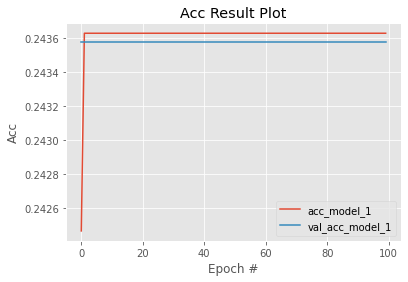

In [12]:
#Plot hasil training model berupa hasil validasi akurasi dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), N.history["acc"], label="acc_model_1")
plt.plot(np.arange(0, 100), N.history["val_acc"], label="val_acc_model_1")
plt.title("Acc Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

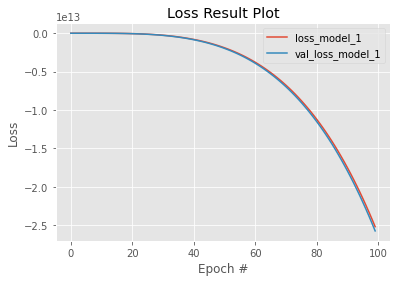

In [13]:
#Plot hasil training model berupa hasil validasi loss dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), N.history["loss"], label="loss_model_1")
plt.plot(np.arange(0, 100), N.history["val_loss"], label="val_loss_model_1")
plt.title("Loss Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
#model 1
from sklearn.metrics import classification_report

pred = model1.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       611
           1       0.24      1.00      0.39       841
           2       0.00      0.00      0.00       627
           3       0.00      0.00      0.00       586
           4       0.00      0.00      0.00       787

    accuracy                           0.24      3452
   macro avg       0.05      0.20      0.08      3452
weighted avg       0.06      0.24      0.10      3452



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
